In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

#  从本地路径读取数据
df = pd.read_csv('/Users/xiaoquanliu/Desktop/Book_DataCode/第七章/DL_Data1.csv')  
df.head()

,Return,Volatility,Beta1,Beta2,Cor1,Cor2,NonSysRisk1,NonSysRisk2,Rsq1,Rsq2,...,OperatingNCFPerShareToP,DividentPerShare,DividentPerShareToP,OVS,NetProfitGrowth,EquityGrowth,RevenueGrowth,OperatingNCFGrowth,OGS,VCG
0,0.208333,0.793486,1.191205,1.197039,0.279326,0.283260,0.040419,0.041566,0.078023,0.080236,...,-0.036693,NaN,NaN,-2.397592,-5.676062,-2.471846,-0.363469,-28.723387,-9.308691,-6.911099
1,0.206897,0.803190,1.228607,1.214824,0.284465,0.283898,0.049695,0.049497,0.080921,0.080598,...,0.102144,NaN,NaN,-1.362336,-6.947614,-3.104480,-0.344917,0.276846,-2.530041,-1.167705
2,0.204545,1.789698,0.583363,0.588300,0.084936,0.086687,0.008429,0.008781,0.007214,0.007515,...,-0.022769,NaN,NaN,-0.128365,-2.218897,-0.173698,-0.123907,0.442386,-0.518529,-0.390164
3,0.203390,0.358219,0.994451,1.023342,0.373375,0.386320,0.018797,0.020122,0.139409,0.149243,...,-0.014056,NaN,NaN,-0.007927,-1.637992,0.333144,-0.317866,-4.468372,-1.522772,-1.514845
4,0.202532,0.934324,0.979415,0.971707,0.173101,0.173454,0.026373,0.026480,0.029964,0.030086,...,0.075264,NaN,NaN,-1.003826,-6.947614,-3.104480,-0.344917,0.276846,-2.530041,-1.526215


In [2]:

# 获取所有变量的观察值数量
num_observations = df.shape[0]
print(f"Number of observations: {num_observations}")

# 获取描述性统计信息
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Number of observations: 423915
Descriptive Statistics:
              Return     Volatility          Beta1          Beta2  \
count  423915.000000  423915.000000  423915.000000  423915.000000   
mean        0.021016       0.454100       1.028283       1.034755   
std         0.022971       0.127152       0.334333       0.339128   
min         0.000100       0.099045      -0.656258      -0.696613   
25%         0.006260       0.370260       0.802248       0.804985   
50%         0.013514       0.445460       1.045427       1.053524   
75%         0.026673       0.529122       1.259022       1.269169   
max         0.208333       2.147820       2.973655       2.945308   

                Cor1           Cor2    NonSysRisk1    NonSysRisk2  \
count  423915.000000  423915.000000  423915.000000  423915.000000   
mean        0.376908       0.382426       0.031190       0.032229   
std         0.130153       0.131137       0.020659       0.021394   
min        -0.118811      -0.120281       0.000

/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xiaoquanliu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


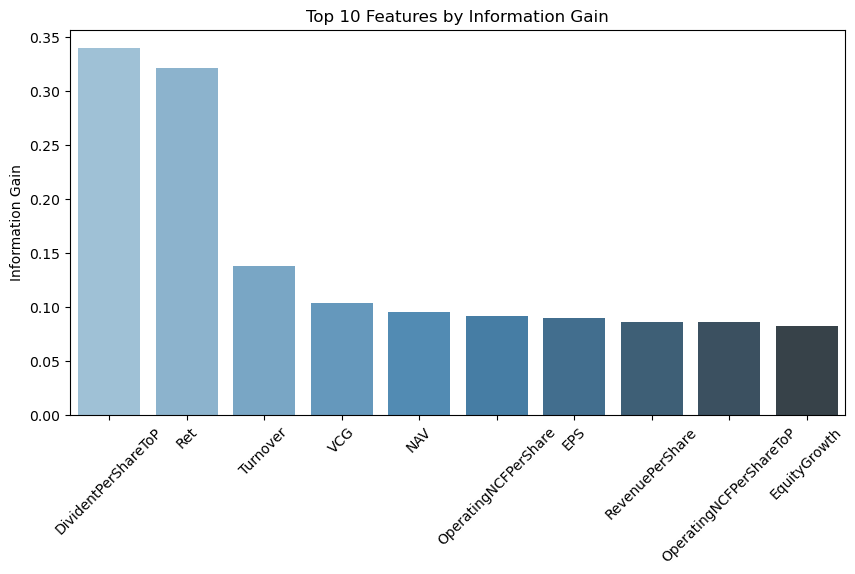

In [3]:
# 3. 清理删除数据的null值
df = df.dropna()

# 假设 'return' 列是我们要预测的股票收益率
y = df['Return']
X = df.drop(columns=['Return'])

# 4. 测试每个feature在预测个股收益率的信息增益IC，并根据测试结果按从高到低进行排序
feature_scores = mutual_info_regression(X, y)
feature_scores_series = pd.Series(feature_scores, index=X.columns)
feature_scores_series = feature_scores_series.sort_values(ascending=False)

# 5. 用条形图对前十名的feature进行可视化展示
top_10_features = feature_scores_series[:10]
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_features.index, y=top_10_features.values, palette="Blues_d")
plt.title('Top 10 Features by Information Gain')
plt.ylabel('Information Gain')
plt.xticks(rotation=45)
plt.show()



In [12]:
print(feature_scores_series)

DividentPerShareToP        0.340376
Ret                        0.321677
Turnover                   0.137909
VCG                        0.103095
NAV                        0.095149
OperatingNCFPerShare       0.091882
EPS                        0.089502
RevenuePerShare            0.086503
OperatingNCFPerShareToP    0.086202
EquityGrowth               0.082467
PB                         0.081757
RevenueGrowth              0.077018
OGS                        0.075965
NetProfitGrowth            0.073312
PS                         0.072662
OperatingNCFGrowth         0.070449
PE                         0.070429
RevenuePerShareToP         0.069680
EPSToP                     0.060211
NAVToP                     0.059779
OVS                        0.059426
PCF                        0.059339
Volatility                 0.057616
DividentPerShare           0.052853
NonSysRisk1                0.028612
Beta2                      0.021192
NonSysRisk2                0.019961
ARsq2                      0

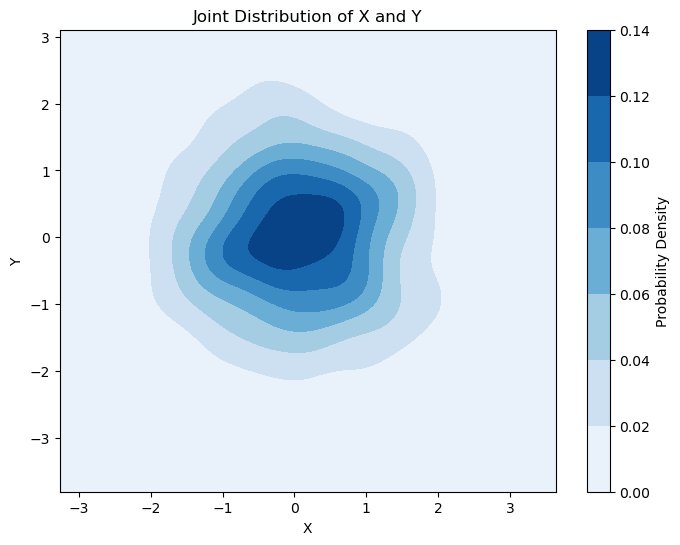

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 假设X和Y是两个连续变量的观测数据
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)

# 使用核密度估计来估计X和Y的联合分布
values = np.vstack([X, Y])
kernel = gaussian_kde(values)

# 定义要评估的网格
xmin = X.min()
xmax = X.max()
ymin = Y.min()
ymax = Y.max()

Xgrid, Ygrid = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([Xgrid.ravel(), Ygrid.ravel()])
Z = np.reshape(kernel(positions).T, Xgrid.shape)

# 使用等高线图可视化联合分布
plt.figure(figsize=(8, 6))
plt.contourf(Xgrid, Ygrid, Z, cmap='Blues')
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Joint Distribution of X and Y')
plt.show()




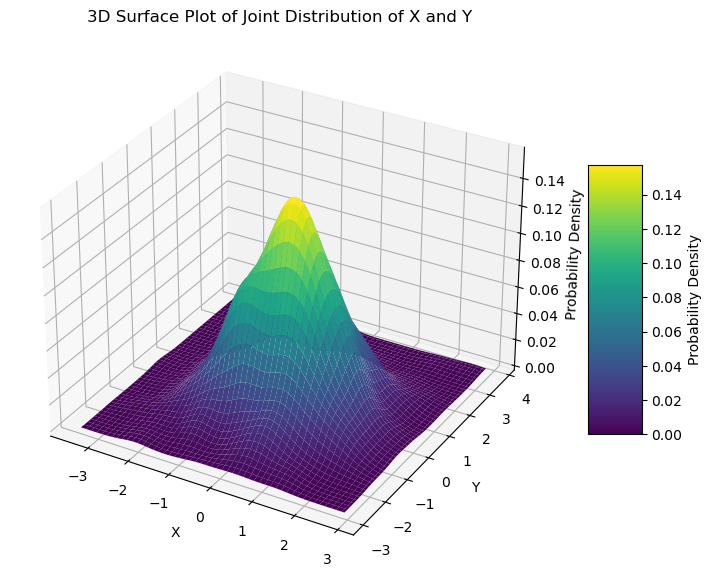

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

# 假设X和Y是两个连续变量的观测数据
X = np.random.normal(0, 1, 1000)
Y = np.random.normal(0, 1, 1000)

# 使用核密度估计来估计X和Y的联合分布
values = np.vstack([X, Y])
kernel = gaussian_kde(values)

# 定义要评估的网格
xmin = X.min()
xmax = X.max()
ymin = Y.min()
ymax = Y.max()

Xgrid, Ygrid = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([Xgrid.ravel(), Ygrid.ravel()])
Z = np.reshape(kernel(positions).T, Xgrid.shape)

# 创建三维图形
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维曲面图
surf = ax.plot_surface(Xgrid, Ygrid, Z, cmap='viridis', edgecolor='none')

# 添加颜色条
fig.colorbar(surf, shrink=0.5, aspect=5, label='Probability Density')

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('3D Surface Plot of Joint Distribution of X and Y')

# 显示图形
plt.show()


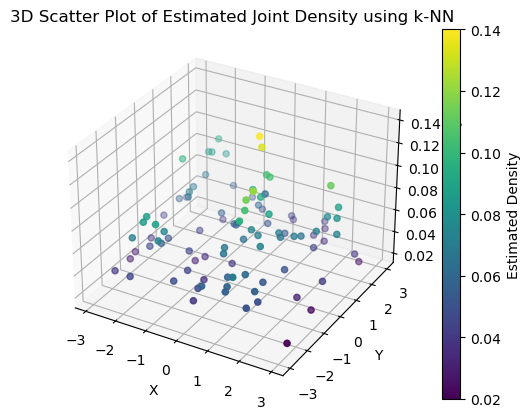

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# 生成随机数据点，范围从-3到3
np.random.seed(0)
X = np.random.uniform(-3, 3, (100, 2))  # 生成100个二维的随机数据点

# 设置k值
k = 5

# 使用k-近邻算法找到最近的k个邻居
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# 估计每个点的局部密度
# 这里我们简单地使用到第k个最近邻居的平均距离的倒数作为密度的近似
densities = 1 / distances[:, -1]

# 调整密度估计值以确保它们在0.02到0.14之间
# 注意：这里的缩放和偏移是基于实验选择的，可能需要根据数据的实际分布进行调整
min_density, max_density = 0.02, 0.14
densities = (densities - densities.min()) / (densities.max() - densities.min())
densities = densities * (max_density - min_density) + min_density

# 确保密度值不超出范围
densities = np.clip(densities, min_density, max_density)

# 创建三维图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 使用点的密度作为颜色值绘制三维散点图
p = ax.scatter(X[:, 0], X[:, 1], densities, c=densities, cmap='viridis')

# 添加颜色条
fig.colorbar(p, label='Estimated Density')

# 设置标签和标题
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Estimated Density')
ax.set_title('3D Scatter Plot of Estimated Joint Density using k-NN')

plt.show()
